<a href="https://colab.research.google.com/github/hansudixit/hansudixit/blob/main/Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyforest

In [ ]:
import pyforest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings("ignore")

READING

In [ ]:
df=pd.read_csv("/content/Company_Data.csv")
df

<IPython.core.display.Javascript object>

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


DATA EXPLORATION

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['US']=encoder.fit_transform(df['US'])
df['ShelveLoc']=encoder.fit_transform(df['ShelveLoc'])
# replace function for urban
df['Urban']=df['Urban'].replace(['Yes','No'],[1,0])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
df['Sales'] = pd.cut(df['Sales'], bins=[0,5.42,10.84,17], labels=[0,1,2])
df.head()

<IPython.core.display.Javascript object>

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [ ]:
df.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
df=df.dropna()
df.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
dtype: object

In [ ]:
df['Sales']=df['Sales'].astype(int)
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [ ]:
#for i in range(0,400):
    #if df.ShelveLoc[i]=='Bad':
        #df.ShelveLoc[i]=0
   # elif df.ShelveLoc[i]=='Good':
        #df.ShelveLoc[i]=1
    #else:
        #df.ShelveLoc[i]=2
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [ ]:
Y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    1
Name: Sales, Length: 399, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=DecisionTreeClassifier()


In [ ]:

parameters={"criterion":['gini',"entropy"],"max_depth":[4,6,8,10,12,14],"min_samples_split":[2,4,6,8]}

In [ ]:
gd=GridSearchCV(model,parameters,cv=10)
gd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
gd.best_score_

0.7272177419354839

In [ ]:
gd.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [ ]:
final_model=DecisionTreeClassifier(criterion='entropy',max_depth=12,min_samples_split=6,random_state=12)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=6,
                       random_state=12)

In [ ]:
y_test_pred=final_model.predict(x_test)
y_test_pred

array([1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.53      0.48      0.50        21
           1       0.67      0.71      0.69        49
           2       0.44      0.40      0.42        10

    accuracy                           0.61        80
   macro avg       0.55      0.53      0.54        80
weighted avg       0.61      0.61      0.61        80



In [ ]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.7148185483870968

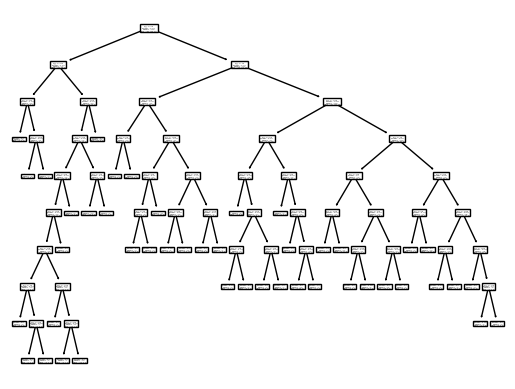

In [ ]:
tree.plot_tree(final_model)
plt.show()

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

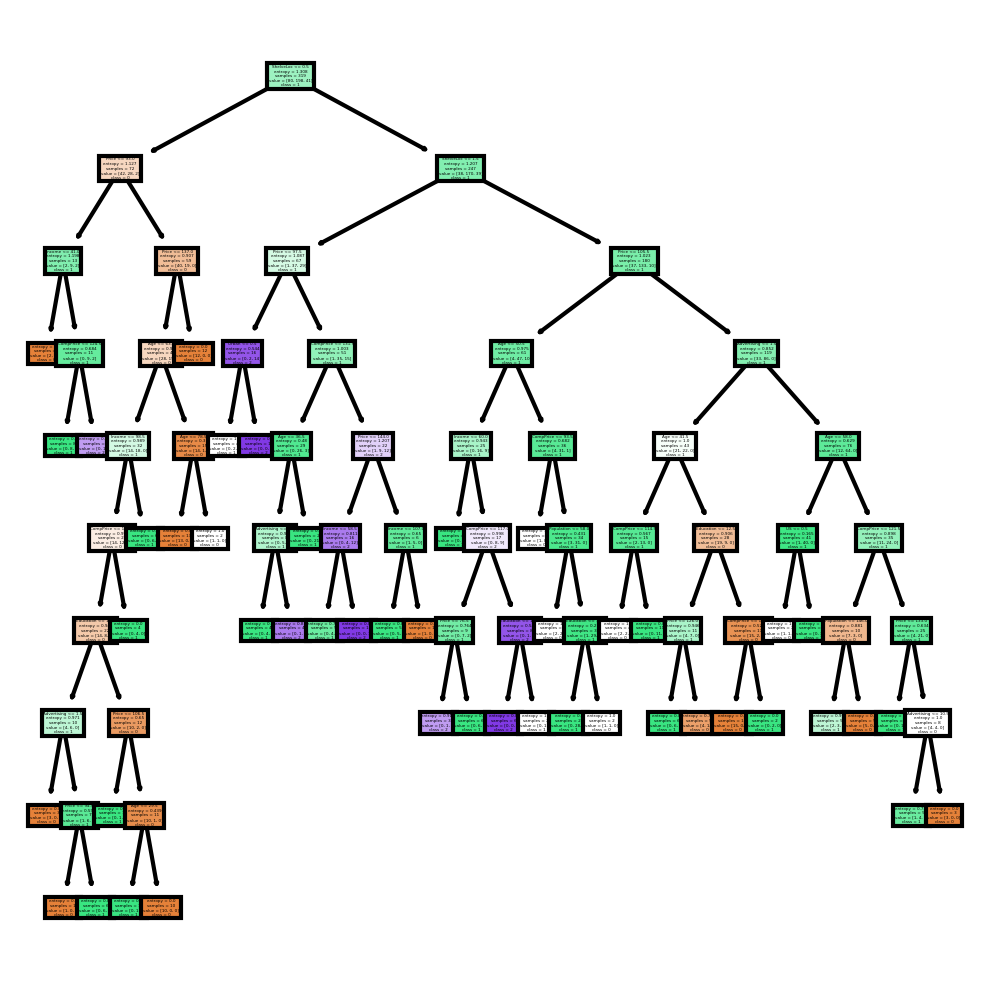

In [ ]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['0','1','2']
fig,axes=plt.subplots(figsize = (4,4), dpi=300)
tree.plot_tree(final_model, feature_names = fn, class_names=cn, filled = True)
plt.show()

In [ ]:
pip install pyforest

In [ ]:
import pyforest
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Fraud_check.csv")
df

<IPython.core.display.Javascript object>

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


DATA EXPLORATION

In [ ]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
print (df.shape)
df.info()

(600, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
df['Taxable.Income']=df['Taxable.Income'].apply(lambda x:0 if x<30000 else 1)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [ ]:
df['Marital.Status']=df['Marital.Status'].replace(['Single','Divorced','Married'],[0,2,1])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,0,1,50047,10,YES
1,YES,2,1,134075,18,YES
2,NO,1,1,160205,30,YES
3,YES,0,1,193264,15,YES
4,NO,1,1,27533,28,NO


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Undergrad']=encoder.fit_transform(df['Undergrad'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,YES
1,1,2,1,134075,18,YES
2,0,1,1,160205,30,YES
3,1,0,1,193264,15,YES
4,0,1,1,27533,28,NO


In [ ]:
df['Urban']=df['Urban'].replace(['YES','NO'],[1,0])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,1,50047,10,1
1,1,2,1,134075,18,1
2,0,1,1,160205,30,1
3,1,0,1,193264,15,1
4,0,1,1,27533,28,0


In [ ]:
df['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [ ]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
df=df.reindex(columns=['Taxable.Income','Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'])
df.head()

,Taxable.Income,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,0,0,50047,10,1
1,1,1,2,134075,18,1
2,1,0,1,160205,30,1
3,1,1,0,193264,15,1
4,1,0,1,27533,28,0


In [ ]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [ ]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1


In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Taxable.Income, dtype: int64

In [ ]:
Y=pd.DataFrame(Y)
Y

<IPython.core.display.Javascript object>

,Taxable.Income
0,1
1,1
2,1
3,1
4,1
...,...
595,1
596,1
597,1
598,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((480, 5), (480, 1), (120, 5), (120, 1))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=DecisionTreeClassifier()
parameters={"criterion":['gini',"entropy"],"max_features":[4,6,8],"max_depth":[4,6,8,10],"min_samples_split":[2,4,6,8]}
grid=GridSearchCV(model,parameters,cv=10)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10], 'max_features': [4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [ ]:
grid.best_score_

0.7895833333333334

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 4,
 'min_samples_split': 2}

In [ ]:
final_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth= 4,
 max_features=4,random_state=12)
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_split=4, random_state=12)

In [ ]:
y_test_pred=final_model.predict(x_test)
y_test

,Taxable.Income
553,1
469,1
482,1
373,1
551,1
...,...
121,0
307,1
479,1
587,1


In [ ]:
score=cross_val_score(final_model,x_train,y_train,cv=10)
score.mean()

0.7895833333333334

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.80      0.98      0.88        96

    accuracy                           0.78       120
   macro avg       0.40      0.49      0.44       120
weighted avg       0.64      0.78      0.70       120



In [ ]:
df.columns

Index(['Taxable.Income', 'Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

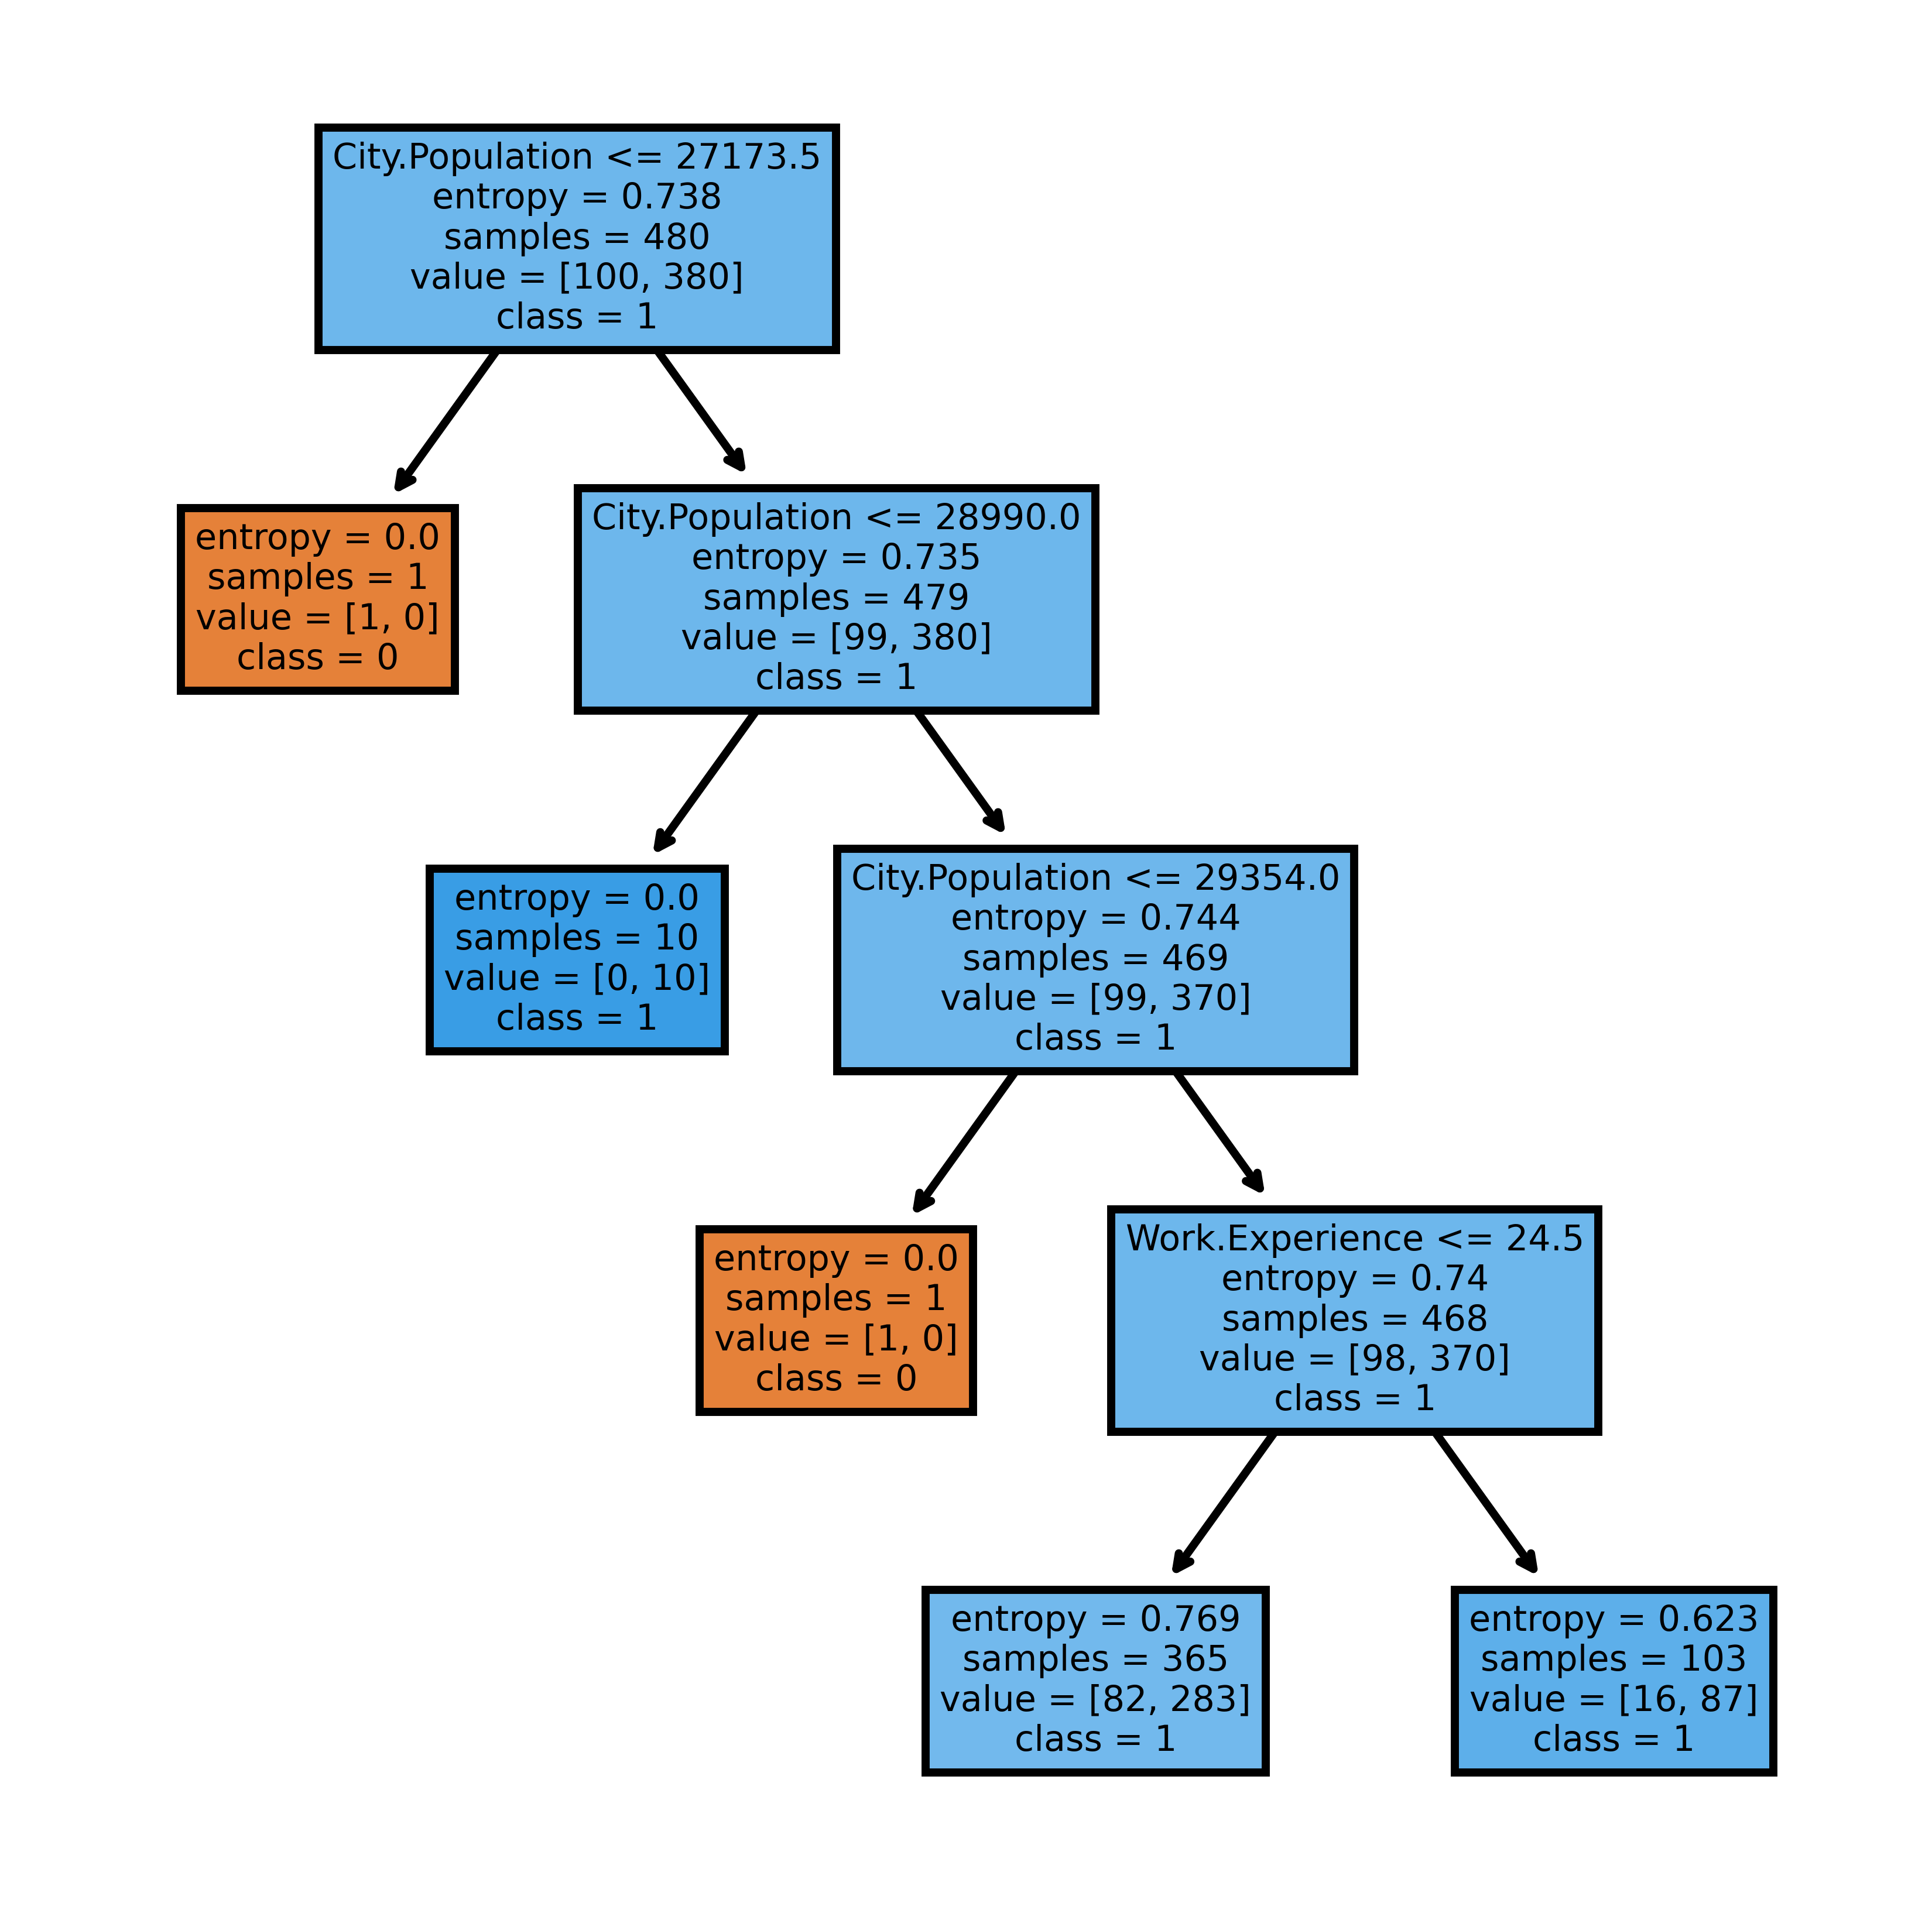

In [ ]:
fn=['Undergrad', 'Marital.Status', 'City.Population',
       'Work.Experience', 'Urban']
cn=['0','1']
fig,axes=plt.subplots(figsize=(4,4),dpi=1000)
tree.plot_tree(final_model,feature_names=fn,class_names=cn,filled=True)
plt.show()